输入数据维度统一为N$\times$L$\times$C(batch_size,seq_len,embedding_dim)

embedding_dim也是channel

# Batch Normalization

NLP不常用.因为不同句子长度不一样，在计算mean和std时，不同的seq长度不一样，且训练和测试的长度不一样，所以L固定最好。

 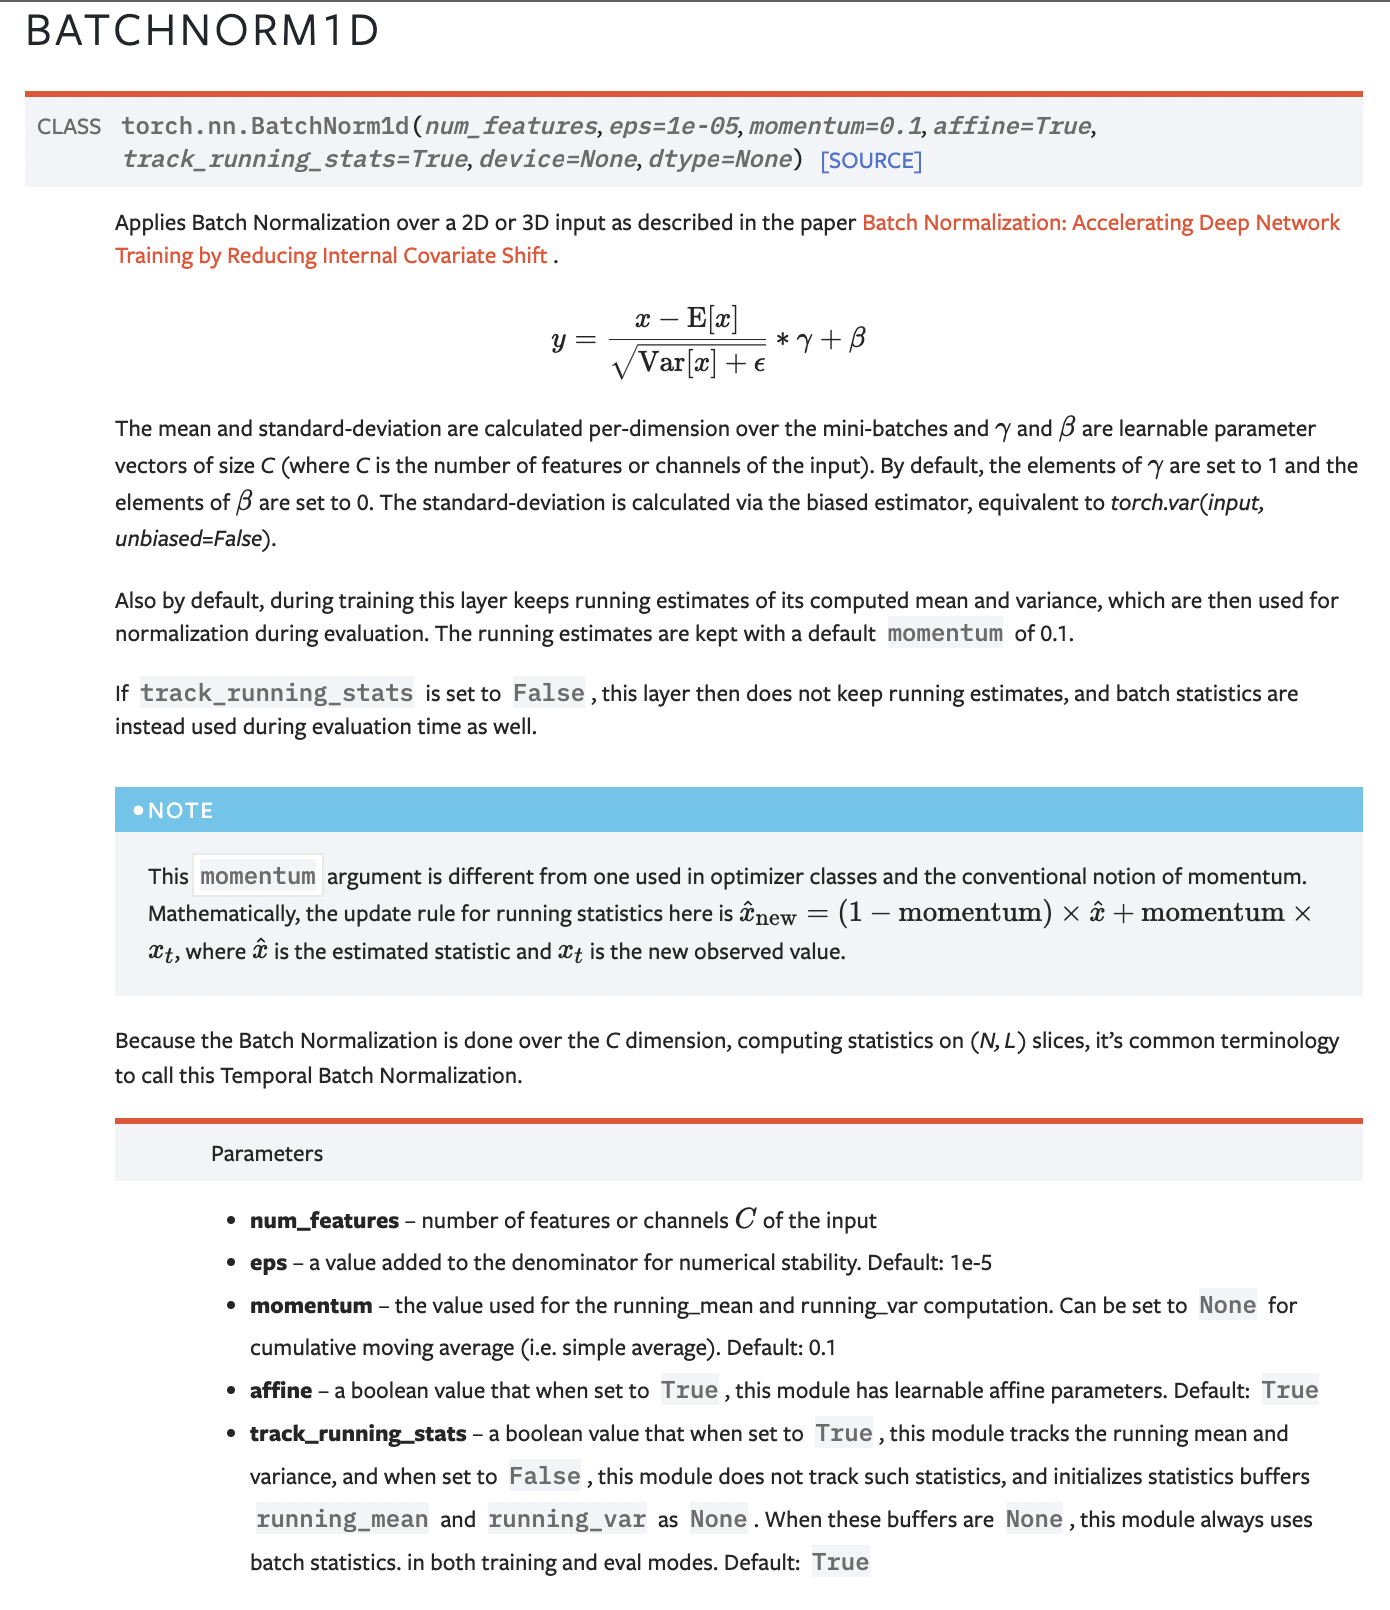

In [6]:
#实现batch norm并验证API
import torch
import torch.nn as nn
batch_size = 2
time_steps = 3
embedding_dim = 4

inputx = torch.randn(batch_size,\
                     time_steps,embedding_dim)#N*L*C


batch_norm_op = torch.nn.BatchNorm1d(embedding_dim,\
                                    affine=False)
bn_y = batch_norm_op(inputx.transpose(-1,-2)).transpose(-1,-2)

#手写batch norm
bn_mean = inputx.mean(dim=(0,1),keepdim=True)
#维度：C，需要扩成N*L*C,所以使用keepdim
bn_std = inputx.std(dim=(0,1),unbiased=False)
verify_bn_y = (inputx-bn_mean)/(bn_std+1e-5)

print(bn_y)
print(verify_bn_y)



tensor([[[ 0.9224,  0.1333,  0.4288, -1.2919],
         [ 0.9343, -1.5990,  0.2503, -0.8546],
         [ 0.8713,  0.3622, -2.0724,  0.8966]],

        [[-1.6591, -0.9602,  0.6871,  1.6353],
         [-0.8452,  0.6834,  0.9602, -0.3472],
         [-0.2237,  1.3803, -0.2541, -0.0383]]])
tensor([[[ 0.9224,  0.1333,  0.4288, -1.2919],
         [ 0.9343, -1.5990,  0.2503, -0.8546],
         [ 0.8713,  0.3622, -2.0724,  0.8967]],

        [[-1.6591, -0.9602,  0.6871,  1.6353],
         [-0.8452,  0.6834,  0.9602, -0.3472],
         [-0.2237,  1.3802, -0.2541, -0.0383]]])


# Layer Normalization

batch_size乘seq_len乘embedding_dim输入到层归一化中，需要对每一时刻（应该是seq_len内部的每个元素）embedding内部算均值方差。NLP常用。

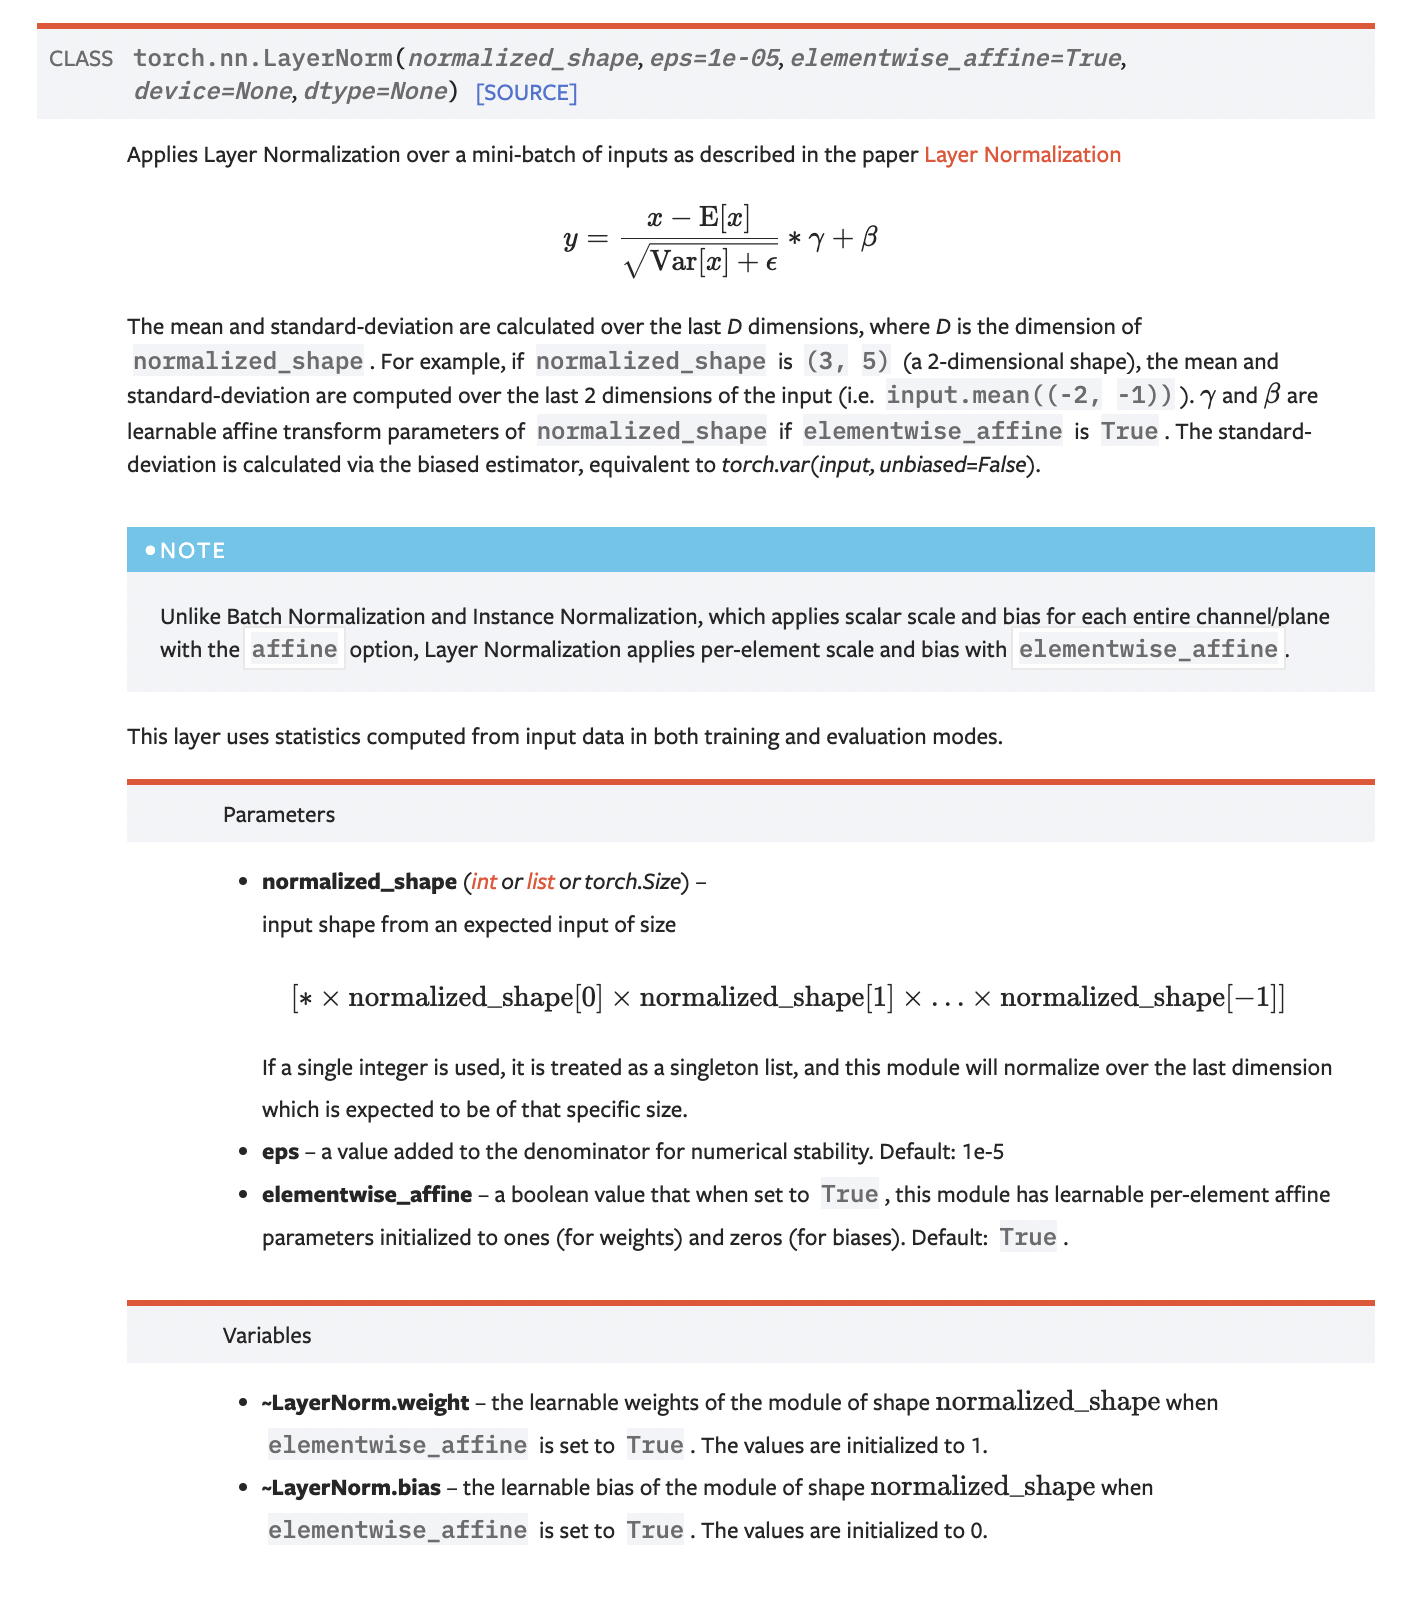

In [7]:
#
layer_norm_op = torch.nn.LayerNorm(embedding_dim,\
                 elementwise_affine=False)
ln_y = layer_norm_op(inputx)

layer_mean = inputx.mean(dim=-1,keepdim=True)
layer_std = inputx.std(dim=-1,keepdim=True,unbiased=False)
verify_ln_y = (inputx-layer_mean)/(layer_std+1e-5)

print(ln_y)
print(verify_ln_y)


tensor([[[ 0.7356,  0.3889,  0.5943, -1.7188],
         [ 1.1462, -1.1865,  0.8193, -0.7791],
         [ 0.8656,  0.8840, -1.5599, -0.1896]],

        [[-1.2595, -0.4204,  1.4825,  0.1974],
         [-0.9371,  0.9429,  1.0536, -1.0595],
         [-0.4266,  1.6711, -0.2680, -0.9765]]])
tensor([[[ 0.7356,  0.3889,  0.5943, -1.7188],
         [ 1.1462, -1.1865,  0.8193, -0.7791],
         [ 0.8655,  0.8840, -1.5599, -0.1896]],

        [[-1.2595, -0.4204,  1.4825,  0.1974],
         [-0.9371,  0.9429,  1.0536, -1.0595],
         [-0.4266,  1.6711, -0.2680, -0.9765]]])


# Instance Normalization

可以实现风格迁移（图片），身份消除（语音）

将时不变的特征去掉了

In [8]:
ins_norm_op = torch.nn.InstanceNorm1d(embedding_dim)

in_y = ins_norm_op(inputx.transpose(-1,-2)
                  ).transpose(-1,-2)
#手写 
in_mean = inputx.mean(dim=1,keepdim=True)#L维度（空间、时间维度）
in_std = inputx.std(dim=1,keepdim=True,unbiased=False)
verify_in_y = (inputx-in_mean)/(in_std+1e-5)
print(in_y)
print(verify_in_y)

tensor([[[ 0.4738,  0.5724,  0.7840, -0.9256],
         [ 0.9042, -1.4061,  0.6273, -0.4632],
         [-1.3780,  0.8338, -1.4113,  1.3887]],

        [[-1.2756, -1.3535,  0.4281,  1.3992],
         [ 0.1091,  0.3216,  0.9532, -0.8769],
         [ 1.1665,  1.0318, -1.3813, -0.5223]]])
tensor([[[ 0.4783,  0.5724,  0.7840, -0.9256],
         [ 0.9128, -1.4061,  0.6273, -0.4632],
         [-1.3911,  0.8338, -1.4113,  1.3887]],

        [[-1.2756, -1.3535,  0.4281,  1.3993],
         [ 0.1091,  0.3216,  0.9532, -0.8770],
         [ 1.1665,  1.0318, -1.3813, -0.5223]]])


# Group Normalization(群归一化——何凯明)

In [ ]:
group_norm_op = torch.nn.GroupNorm(num_groups,\
                embedding_dim,affine=False)
